Import the necessary libraries to perform the processing and plotting.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Load and isolate the Married column needed for the univariant analysis.

In [9]:
raw_data = pd.read_csv("./data/raw_data.csv")

maritual_data = raw_data['Married']

Find the mode of the data and prepare it to replace missing data with the mode.

In [10]:
mode = maritual_data.mode().values[0]
if mode == "Yes":
    mode = 1
elif mode == "No":
    mode = 0

Encode the Married column to save space and improve processing speeds.

In [11]:
le = LabelEncoder()
encoded_maritual = le.fit_transform(maritual_data)

Replace every instance of missing data (transformed to 2) with the mode of the data (in this case Yes or 0 after encoded).

In [12]:
encoded_maritual = np.where(encoded_maritual == 2, mode, encoded_maritual)

Now we can continue to count the number of each instance of Yes(401) or No(213) = 614.

In [13]:
a = np.array(encoded_maritual)
b = np.unique(a, return_counts=True)
yes_totals = b[1][1]
no_totals = b[1][0]
maritual_totals = yes_totals, no_totals

Plot the data using a bar graph.

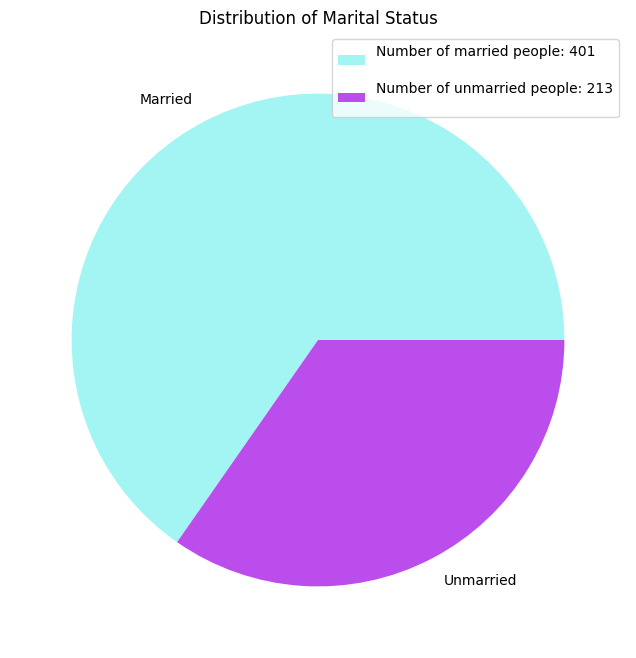

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(maritual_totals, labels=['Married', 'Unmarried'], colors=['#A3F5F3', '#BB4DED'])
plt.title('Distribution of Marital Status')

legend_text = [
    f"Number of married people: {maritual_totals[0]}\n",
    f"Number of unmarried people: {maritual_totals[1]}\n",
]
plt.legend(labels=legend_text, loc='upper right', facecolor=None)
plt.show()

As we can see from the chart, the majority of people are married with a total of 401 of 614 people and 213 are unmarried.